### LECTURA DE NUESTROS DATOS Y ESTRUCTURA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes


In [2]:
linea137_ID = pd.read_csv('datos nuevo\linea137_intervenciones_cap4.csv')
linea137_LL = pd.read_csv('datos nuevo\linea137_llamados_cap4.csv')
linea144 = pd.read_csv('datos nuevo\linea144_cap4.csv')


In [3]:
linea137_ID.shape

(3427, 5)

In [4]:
linea137_LL.shape

(61436, 5)

In [5]:
linea144.shape

(89541, 5)

In [6]:
for col in linea137_ID.columns:
    print(f"Columna: {col}")                          # Muestra el nombre de la columna
    print("Valores únicos:", linea137_ID[col].unique())  # Muestra todos los valores únicos
    print("Cantidad de valores únicos:", linea137_ID[col].nunique())  # Número de valores únicos
    print("-"*40)  # Separador visual

Columna: rango_etario
Valores únicos: ['18-29' '0-17' '30-44' '45-59' '60+' nan]
Cantidad de valores únicos: 5
----------------------------------------
Columna: victima_genero
Valores únicos: ['FEMENINO' 'MASCULINO' 'Sin dato' 'TRANSGÉNERO']
Cantidad de valores únicos: 4
----------------------------------------
Columna: agresor_genero
Valores únicos: [nan]
Cantidad de valores únicos: 0
----------------------------------------
Columna: agresor_relacion_victima
Valores únicos: ['PAREJA/EX PAREJA' 'FAMILIAR INDIRECTO' 'FAMILIAR DIRECTO'
 'OTRO CONVIVIENTE' 'OTRO NO CONVIVIENTE' 'SIN DATO']
Cantidad de valores únicos: 6
----------------------------------------
Columna: violencia_tipo
Valores únicos: ['FÍSICA, PSICOLÓGICA' 'PSICOLÓGICA' 'ECONÓMICA, FÍSICA, PSICOLÓGICA'
 'ECONÓMICA, FÍSICA, PSICOLÓGICA, SEXUAL' 'SEXUAL' 'FÍSICA'
 'ECONÓMICA, FÍSICA' 'FÍSICA, PSICOLÓGICA, SEXUAL' 'OTRA'
 'ECONÓMICA, SEXUAL' 'ECONÓMICA' 'FÍSICA, SEXUAL'
 'NO ES UN CASO DE VIOLENCIA FAMILIAR' 'EXPLOTACIÓN COMER

In [7]:
for col in linea137_LL.columns:
    print(f"Columna: {col}")                          # Muestra el nombre de la columna
    print("Valores únicos:", linea137_LL[col].unique())  # Muestra todos los valores únicos
    print("Cantidad de valores únicos:", linea137_LL[col].nunique())  # Número de valores únicos
    print("-"*40)  # Separador visual

Columna: rango_etario
Valores únicos: ['18-29' '0-17' nan '30-44' '45-59' '60+']
Cantidad de valores únicos: 5
----------------------------------------
Columna: victima_genero
Valores únicos: ['FEMENINO' 'Sin Dato' 'MASCULINO' 'TRANSGÉNERO']
Cantidad de valores únicos: 4
----------------------------------------
Columna: agresor_genero
Valores únicos: ['FEMENINO' 'MASCULINO' 'Sin dato' 'TRANSGÉNERO']
Cantidad de valores únicos: 4
----------------------------------------
Columna: agresor_relacion_victima
Valores únicos: ['FAMILIAR DIRECTO' 'PAREJA/EX PAREJA' 'SIN DATO' 'OTRO NO CONVIVIENTE'
 'OTRO CONVIVIENTE' 'FAMILIAR INDIRECTO']
Cantidad de valores únicos: 6
----------------------------------------
Columna: violencia_tipo
Valores únicos: ['FÍSICA, PSICOLÓGICA' 'PSICOLÓGICA' 'NO APLICA'
 'ECONÓMICA, FÍSICA, PSICOLÓGICA' 'OTRAS' 'ECONÓMICA, PSICOLÓGICA'
 'PSICOLÓGICA, SEXUAL' 'ECONÓMICA, PSICOLÓGICA, SEXUAL'
 'NO ES UN CASO DE VIOLENCIA FAMILIAR' 'FÍSICA, PSICOLÓGICA, SEXUAL'
 'SIN DATO

In [8]:
for col in linea144.columns:
    print(f"Columna: {col}")                          # Muestra el nombre de la columna
    print("Valores únicos:", linea144[col].unique())  # Muestra todos los valores únicos
    print("Cantidad de valores únicos:", linea144[col].nunique())  # Número de valores únicos
    print("-"*40)  # Separador visual

Columna: rango_etario
Valores únicos: [nan '30-44' '18-29' '45-59' '60+' '0-17']
Cantidad de valores únicos: 5
----------------------------------------
Columna: victima_genero
Valores únicos: ['FEMENINO' 'SIN DATO' 'MASCULINO' 'TRANSGÉNERO' 'OTROS' 'TRAVESTI']
Cantidad de valores únicos: 6
----------------------------------------
Columna: agresor_genero
Valores únicos: ['MASCULINO' 'SIN DATO' 'OTROS' 'FEMENINO' 'TRANSGÉNERO' 'TRAVESTI']
Cantidad de valores únicos: 6
----------------------------------------
Columna: agresor_relacion_victima
Valores únicos: ['PAREJA/EX PAREJA' 'FAMILIAR INDIRECTO' 'OTRO NO CONVIVIENTE'
 'FAMILIAR DIRECTO' 'SIN DATO']
Cantidad de valores únicos: 5
----------------------------------------
Columna: violencia_tipo
Valores únicos: ['FÍSICA, OTRAS, PSICOLÓGICA' 'OTRAS, PSICOLÓGICA'
 'ECONÓMICA, FÍSICA, OTRAS, PSICOLÓGICA'
 'ECONÓMICA, OTRAS, PSICOLÓGICA, SIMBOLICA'
 'FÍSICA, OTRAS, PSICOLÓGICA, SIMBOLICA'
 'ECONÓMICA, FÍSICA, OTRAS, PSICOLÓGICA, SIMBOLICA' 'FÍ

In [9]:
def clasificar_multiviolencia(x):
    if pd.isna(x):
        return "SIN DATO"
    tipos = x.split(",")
    tipos = [t.strip() for t in tipos]
    if len(tipos) > 1:
        return "MULTIVIOLENCIA"
    else:
        return tipos[0]

linea144['violencia_tipo_simple'] = linea144['violencia_tipo'].apply(clasificar_multiviolencia)
linea137_LL['violencia_tipo_simple'] = linea137_LL['violencia_tipo'].apply(clasificar_multiviolencia)
linea137_ID['violencia_tipo_simple'] = linea137_ID['violencia_tipo'].apply(clasificar_multiviolencia)

In [10]:
# 2. Seleccionar solo las columnas relevantes
cols_relevantes = ['rango_etario', 'victima_genero', 'agresor_genero',
                   'agresor_relacion_victima', 'violencia_tipo_simple']

### Línea 137 – Llamados

In [11]:

linea137_LL = linea137_LL[cols_relevantes]
df = linea137_LL[cols_relevantes].fillna('Sin Dato')  # reemplazamos NA


In [ ]:
# Selección de la muestra, con 2000 funciona pero con mas tarda mucho
#np.random.seed(42) # para reproducibilidad 
#sample_size = 2000 
#linea137_LL_sample = linea137_LL.sample(n=sample_size, random_state=42)
# Calcular la matriz de distancias de Gower 
#gower_dist = gower.gower_matrix(linea137_LL_sample)
# linkage_matrix = linkage(gower_dist, method='average') 
# print(linkage_matrix) 
#Visualizar el dendrograma 
# plt.figure(figsize=(12, 6)) 
# dendrogram(linkage_matrix, truncate_mode='lastp', p=30, 
#   leaf_rotation=90, leaf_font_size=10, show_contracted=True) 
# plt.title("Dendrograma - Línea 137 Llamados (muestra)") 
# plt.xlabel("Registros") 
# plt.ylabel("Distancia") plt.show()

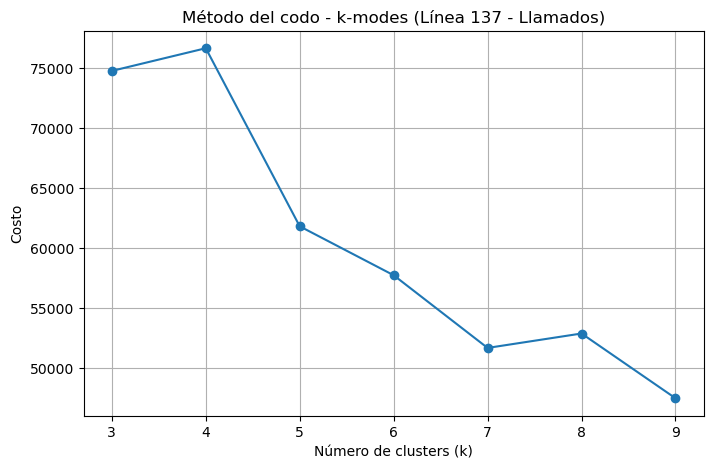

range(3, 10)
[74774.0, 76664.0, 61833.0, 57758.0, 51704.0, 52905.0, 47515.0]


In [12]:
# Probamos diferentes valores de k
cost = []
K = range(3, 10)  # probamos de 2 a 7 clusters
for k in K:
    km = KModes(n_clusters=k, init='Huang', n_init=1, verbose=0)
    km.fit(df)
    cost.append(km.cost_)
# Graficamos la curva del codo
plt.figure(figsize=(8,5))
plt.plot(K, cost, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Costo')
plt.title('Método del codo - k-modes (Línea 137 - Llamados)')
plt.xticks(K)
plt.grid(True)
plt.show()
print (K)
print(cost)

In [13]:
# Número de clusters
n_clusters = 5
km = KModes(n_clusters, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(df)

# Agregamos la columna de cluster al DataFrame
df['cluster'] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 20819, cost: 62188.0
Run 1, iteration: 2/100, moves: 619, cost: 62188.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 7749, cost: 65836.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 5123, cost: 63306.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 7017, cost: 59294.0
Run 4, iteration: 2/100, moves: 6967, cost: 59294.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 9362, cost: 60634.0
Run 5, iteration: 2/100, moves: 3594, cost: 60634.0
Best run was number 4


In [14]:


# Lista para guardar los datos de cada cluster
resumen_clusters = []

for c in range(n_clusters):
    cluster_data = df[df['cluster'] == c]
    n_casos = cluster_data.shape[0]
    perfil_modal = cluster_data.mode().iloc[0].to_dict()  # Convertimos a diccionario
    
    # Agregamos cantidad de casos al diccionario
    perfil_modal['Cantidad de casos'] = n_casos
    perfil_modal['Cluster'] = c
    
    resumen_clusters.append(perfil_modal)

# Creamos el DataFrame resumen
df_resumen = pd.DataFrame(resumen_clusters)

# Reordenamos columnas para que Cluster y Cantidad de casos estén al inicio
cols = ['Cluster', 'Cantidad de casos'] + [col for col in df_resumen.columns if col not in ['Cluster','Cantidad de casos']]
df_resumen = df_resumen[cols]

# Mostramos el resultado
df_resumen.head()

,Cluster,Cantidad de casos,rango_etario,victima_genero,agresor_genero,agresor_relacion_victima,violencia_tipo_simple,cluster
0,0,17071,30-44,FEMENINO,MASCULINO,PAREJA/EX PAREJA,MULTIVIOLENCIA,0
1,1,16348,Sin Dato,FEMENINO,MASCULINO,FAMILIAR DIRECTO,PSICOLÓGICA,1
2,2,7090,0-17,FEMENINO,MASCULINO,FAMILIAR DIRECTO,MULTIVIOLENCIA,2
3,3,6863,18-29,FEMENINO,MASCULINO,PAREJA/EX PAREJA,MULTIVIOLENCIA,3
4,4,14064,Sin Dato,Sin Dato,Sin dato,SIN DATO,NO APLICA,4


In [26]:
print(df_resumen.to_string())

   Cluster  Cantidad de casos rango_etario victima_genero agresor_genero agresor_relacion_victima violencia_tipo_simple  cluster
0        0              17071        30-44       FEMENINO      MASCULINO         PAREJA/EX PAREJA        MULTIVIOLENCIA        0
1        1              16348     Sin Dato       FEMENINO      MASCULINO         FAMILIAR DIRECTO           PSICOLÓGICA        1
2        2               7090         0-17       FEMENINO      MASCULINO         FAMILIAR DIRECTO        MULTIVIOLENCIA        2
3        3               6863        18-29       FEMENINO      MASCULINO         PAREJA/EX PAREJA        MULTIVIOLENCIA        3
4        4              14064     Sin Dato       Sin Dato       Sin dato                 SIN DATO             NO APLICA        4


### Línea 137 – Intervenciones dom

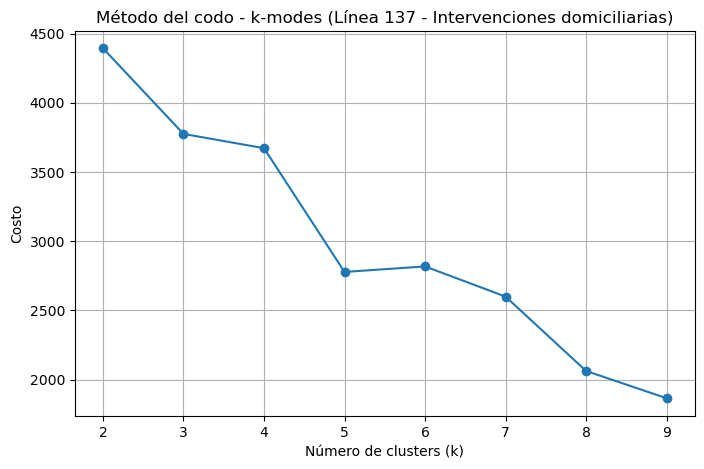

range(2, 10)
[4394.0, 3775.0, 3672.0, 2778.0, 2818.0, 2600.0, 2063.0, 1866.0]


In [15]:

linea137_ID = linea137_ID[cols_relevantes]
df_137_ID = linea137_ID[cols_relevantes].fillna('Sin Dato')  # reemplazamos NA

cost = []
K_137_ID = range(2, 10) 
for k in K_137_ID:
    km = KModes(n_clusters=k, init='Huang', n_init=1, verbose=0)
    km.fit(df_137_ID)
    cost.append(km.cost_)
# Graficamos la curva del codo
plt.figure(figsize=(8,5))
plt.plot(K_137_ID, cost, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Costo')
plt.title('Método del codo - k-modes (Línea 137 - Intervenciones domiciliarias)')
plt.xticks(K_137_ID)
plt.grid(True)
plt.show()
print (K_137_ID)
print(cost)

In [16]:

# Número de clusters
n_clusters_137_ID = 5
# Clustering final con k=5
km_137_ID = KModes(n_clusters_137_ID, init='Huang', n_init=5, verbose=1)
clusters_137_ID = km_137_ID.fit_predict(df_137_ID)

# Agregamos la columna de cluster al DataFrame
df_137_ID['cluster'] = clusters_137_ID


# Lista para guardar los datos de cada cluster
resumen_clusters = []

for c in range(n_clusters_137_ID):
    cluster_data = df_137_ID[df_137_ID['cluster'] == c]
    n_casos = cluster_data.shape[0]
    perfil_modal = cluster_data.mode().iloc[0].to_dict()  # Convertimos a diccionario
    
    # Agregamos cantidad de casos al diccionario
    perfil_modal['Cantidad de casos'] = n_casos
    perfil_modal['Cluster'] = c
    
    resumen_clusters.append(perfil_modal)

# Creamos el DataFrame resumen
df_resumen_137_ID = pd.DataFrame(resumen_clusters)

# Reordenamos columnas para que Cluster y Cantidad de casos estén al inicio
cols = ['Cluster', 'Cantidad de casos'] + [col for col in df_resumen_137_ID.columns if col not in ['Cluster','Cantidad de casos']]
df_resumen_137_ID = df_resumen_137_ID[cols]

# Mostramos el resultado
df_resumen_137_ID.head()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 809, cost: 2997.0
Run 1, iteration: 2/100, moves: 201, cost: 2997.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 759, cost: 2694.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 433, cost: 3063.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 538, cost: 3229.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 339, cost: 2793.0
Best run was number 2


,Cluster,Cantidad de casos,rango_etario,victima_genero,agresor_genero,agresor_relacion_victima,violencia_tipo_simple,cluster
0,0,1010,0-17,MASCULINO,Sin Dato,FAMILIAR DIRECTO,PSICOLÓGICA,0
1,1,828,18-29,FEMENINO,Sin Dato,SIN DATO,FÍSICA,1
2,2,880,0-17,FEMENINO,Sin Dato,FAMILIAR DIRECTO,PSICOLÓGICA,2
3,3,90,60+,FEMENINO,Sin Dato,FAMILIAR DIRECTO,MULTIVIOLENCIA,3
4,4,619,30-44,FEMENINO,Sin Dato,PAREJA/EX PAREJA,MULTIVIOLENCIA,4


In [24]:
print(df_resumen_137_ID.to_string())

   Cluster  Cantidad de casos rango_etario victima_genero agresor_genero agresor_relacion_victima violencia_tipo_simple  cluster
0        0               1010         0-17      MASCULINO       Sin Dato         FAMILIAR DIRECTO           PSICOLÓGICA        0
1        1                828        18-29       FEMENINO       Sin Dato                 SIN DATO                FÍSICA        1
2        2                880         0-17       FEMENINO       Sin Dato         FAMILIAR DIRECTO           PSICOLÓGICA        2
3        3                 90          60+       FEMENINO       Sin Dato         FAMILIAR DIRECTO        MULTIVIOLENCIA        3
4        4                619        30-44       FEMENINO       Sin Dato         PAREJA/EX PAREJA        MULTIVIOLENCIA        4


### Línea 144


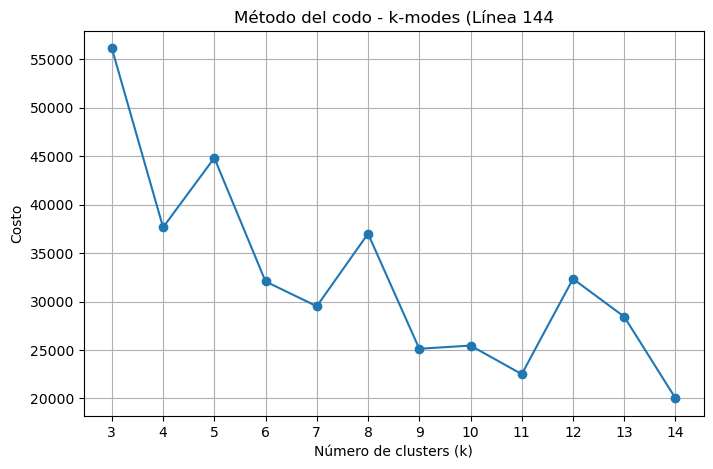

range(3, 15)
[56139.0, 37652.0, 44820.0, 32067.0, 29508.0, 36998.0, 25123.0, 25454.0, 22503.0, 32338.0, 28431.0, 20019.0]


In [17]:

linea144 = linea144[cols_relevantes]
df_144 = linea144[cols_relevantes].fillna('Sin Dato')  # reemplazamos NA

cost = []
K_144 = range(3, 15) 
for k in K_144:
    km = KModes(n_clusters=k, init='Huang', n_init=1, verbose=0)
    km.fit(df_144)
    cost.append(km.cost_)
# Graficamos la curva del codo
plt.figure(figsize=(8,5))
plt.plot(K_144, cost, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Costo')
plt.title('Método del codo - k-modes (Línea 144')
plt.xticks(K_144)
plt.grid(True)
plt.show()
print (K_144)
print(cost)

In [ ]:

# Número de clusters
n_clusters = 6
km_144 = KModes(n_clusters, init='Huang', n_init=5, verbose=1)
clusters_144 = km_144.fit_predict(df_144)

# Agregamos la columna de cluster al DataFrame
df_144['cluster'] = clusters_144


# Lista para guardar los datos de cada cluster
resumen_clusters = []

for c in range(n_clusters):
    cluster_data = df_144[df_144['cluster'] == c]
    n_casos = cluster_data.shape[0]
    perfil_modal = cluster_data.mode().iloc[0].to_dict()  # Convertimos a diccionario
    
    # Agregamos cantidad de casos al diccionario
    perfil_modal['Cantidad de casos'] = n_casos
    perfil_modal['Cluster'] = c
    
    resumen_clusters.append(perfil_modal)

# Creamos el DataFrame resumen
df_resumen_144 = pd.DataFrame(resumen_clusters)

# Reordenamos columnas para que Cluster y Cantidad de casos estén al inicio
cols = ['Cluster', 'Cantidad de casos'] + [col for col in df_resumen_144.columns if col not in ['Cluster','Cantidad de casos']]
df_resumen_144 = df_resumen_144[cols]



Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5948, cost: 50492.0
Run 1, iteration: 2/100, moves: 546, cost: 50492.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 5982, cost: 50177.0
Run 2, iteration: 2/100, moves: 5505, cost: 50177.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 4056, cost: 56060.0
Run 3, iteration: 2/100, moves: 1077, cost: 56060.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 6716, cost: 55238.0
Run 4, iteration: 2/100, moves: 36, cost: 55238.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 15559, cost: 43670.0
Run 5, iteration: 2/100, moves: 17, cost: 43670.0
Best run was number 5
   Cluster  Cantidad de casos rango_etario victima_genero agre

In [25]:
# Mostramos el resultado
print(df_resumen_144.to_string())

   Cluster  Cantidad de casos rango_etario victima_genero agresor_genero agresor_relacion_victima violencia_tipo_simple  cluster
0        0              26961        18-29       FEMENINO      MASCULINO         PAREJA/EX PAREJA        MULTIVIOLENCIA        0
1        1               9582        45-59       FEMENINO      MASCULINO         PAREJA/EX PAREJA        MULTIVIOLENCIA        1
2        2               2123        30-44       FEMENINO       SIN DATO         PAREJA/EX PAREJA        MULTIVIOLENCIA        2
3        3               7404     Sin Dato       FEMENINO       SIN DATO         PAREJA/EX PAREJA        MULTIVIOLENCIA        3
4        4               3758        30-44       FEMENINO      MASCULINO      OTRO NO CONVIVIENTE        MULTIVIOLENCIA        4
5        5              39713        30-44       FEMENINO      MASCULINO         PAREJA/EX PAREJA        MULTIVIOLENCIA        5
